<a href="https://colab.research.google.com/github/toba717/stock_market_prediction/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction
## Takao Oba
### Assisted by Dataquest


I will be utilizing the built in yfinance package to access the yahoo finance dataset

In [1]:
!pip install yfinance
import yfinance as yf # calls yahoo finance api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
sp500 = yf.Ticker("^GSPC") # initialize ticker class

yfinance.Ticker object <^GSPC>

In [4]:
sp500 = sp500.history(period = "max") # query from very beginning

In [5]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [6]:
sp500.index # very left column

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2022-12-13 00:00:00-05:00', '2022-12-14 00:00:00-05:00',
               '2022-12-15 00:00:00-05:00', '2022-12-16 00:00:00-05:00',
               '2022-12-19 00:00:00-05:00', '2022-12-20 00:00:00-05:00',
               '2022-12-21 00:00:00-05:00', '2022-12-22 00:00:00-05:00',
               '2022-12-23 00:00:00-05:00', '2022-12-27 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23862, freq=None)

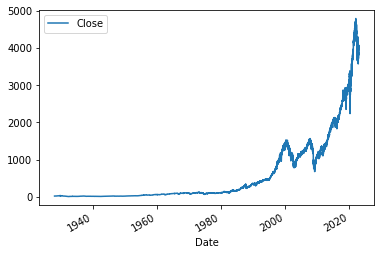

In [7]:
# plot the closing price against index

sp500.plot.line(y = "Close", use_index = True)

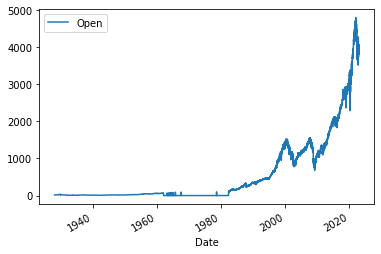

In [8]:
sp500.plot.line(y = "Open", use_index = True)

In [8]:
# We will not be utilizing the dividends and stock splits column in the original df
del sp500["Dividends"]
del sp500["Stock Splits"]

In [9]:
# add a new tomorrow column in the df which will represent the next business day's stock price.
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
# target variable is if stock price goes up or down
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
# now we see that there is a new boolean column
# 1 represents that the price has gone up
# 0 if otherwise
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0


In [12]:
# only look at dates after 1990 since we will consider the dates before this to be irrelevant 
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


In [15]:
# now we look into training the model

In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 717)

train = sp500.iloc[:-100] # consider that this is a time series model so we cannot use cross validation, prevent leakage
test = sp500.iloc[-100:]


predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=717)

In [26]:
preds = model.predict(train[predictors])

import pandas as pd

preds = pd.Series(preds, index = train.index)
precision_score(train["Target"], preds)

0.7115668883961567

In [27]:
# The training accuracy rate is decently high with approximately 71%
# Now we look into the testing dataset

In [28]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [29]:
preds = pd.Series(preds, index = test.index)

In [24]:
preds

Date
2022-08-05 00:00:00-04:00    0
2022-08-08 00:00:00-04:00    1
2022-08-09 00:00:00-04:00    1
2022-08-10 00:00:00-04:00    1
2022-08-11 00:00:00-04:00    0
                            ..
2022-12-20 00:00:00-05:00    0
2022-12-21 00:00:00-05:00    1
2022-12-22 00:00:00-05:00    0
2022-12-23 00:00:00-05:00    1
2022-12-27 00:00:00-05:00    0
Length: 100, dtype: int64

In [30]:
# Finding the model accuracy rate
precision_score(test["Target"], preds)

0.352112676056338

In [44]:
combined = pd.concat([test["Target"], preds], axis = 1)
print(combined.columns.values)

['Target' 0]


In [45]:
combined = combined.set_axis(['Target', 'Predicted'], axis=1, inplace=False)
combined

,Target,Predicted
Date,,
2022-08-05 00:00:00-04:00,0,0
2022-08-08 00:00:00-04:00,0,1
2022-08-09 00:00:00-04:00,1,1
2022-08-10 00:00:00-04:00,0,1
2022-08-11 00:00:00-04:00,1,0
...,...,...
2022-12-20 00:00:00-05:00,1,0
2022-12-21 00:00:00-05:00,0,1
2022-12-22 00:00:00-05:00,1,0


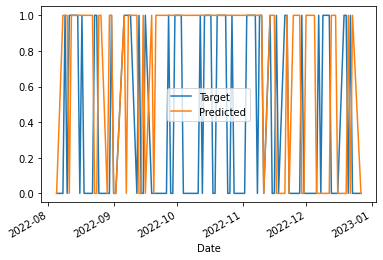

In [46]:
combined.plot() 
# orange is our prediction
# blue is what actually happened  

In [47]:
# constructing a backtesting method

In [69]:
# define a predict function that will undergo what we have previously did

def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index = test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined



In [70]:
# typically 250 trading days so 2500 represents 10 years
def backtest(data, model, predictors, start = 2500, step = 250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy() # remember that since this is predicting the future, we can only look in the past
    test = data.iloc[i:(i+step)].copy() # we are trying to test the next time steps which is the current iteration to the next step
    predictions = predict(train, test, predictors, model) # generate predictions (which will be returned in the form of combined df)
    all_predictions.append(predictions) # append this combiend df to the variable we defined outside the loop

  return pd.concat(all_predictions)

In [71]:
predictions = backtest(sp500, model, predictors)

In [73]:
# prediction
predictions["Predictions"].value_counts() # count how many time we decided to buy 

,Target,Predictions
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,0
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0
...,...,...
2022-12-20 00:00:00-05:00,1,0
2022-12-21 00:00:00-05:00,0,0
2022-12-22 00:00:00-05:00,1,0


In [74]:
precision_score(predictions["Target"], predictions["Predictions"]) # access the accuracy by comparing at "Target" (actual) and the "Predictions" (predicted)

0.5310734463276836

In [78]:
# Below, we see how often the stock market actually went up, which indicates that we should have bought it if we knew the future
predictions["Target"].value_counts()/predictions.shape[0]
# The S&P actually went up 53.4% which is greater than the precision score. 
# Therefore, our generated model is losing on the long run
# We aim to change this through adding more factors

1    0.534067
0    0.465933
Name: Target, dtype: float64

In [84]:
# horizons which we want to see rolling means
horizons = [2,5,60,250,1000]

new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean() # computing the rolling averages for each horizon, note this would introduced NAs

  ratio_column = f"Close_Ratio_{horizon}" 
  sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"] #comparing the closing price to the averages
  
  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] # find the sum of the rolling values that we will consider to be the trend (if greater, can indicate the stock is growing)
  
  new_predictors += [ratio_column, trend_column]

In [85]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,3878.439941,1,1.000518,1.0,0.985832,1.0,0.995128,24.0,0.927108,108.0,1.054372,542.0
2022-12-21 00:00:00-05:00,3839.489990,3889.820068,3839.489990,3878.439941,3775200000,3822.389893,0,1.007379,2.0,1.006559,2.0,1.008911,25.0,0.941667,108.0,1.069626,543.0
2022-12-22 00:00:00-05:00,3853.260010,3853.260010,3764.489990,3822.389893,3956950000,3844.820068,1,0.992722,1.0,0.995805,2.0,0.993885,24.0,0.928932,107.0,1.053793,542.0


In [87]:
# since NA's are introduced because we are considering "rolling", we will drop these columns

sp500 = sp500.dropna()

In [88]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,3821.620117,1,0.995476,0.0,0.974851,1.0,0.994816,23.0,0.925362,108.0,1.053661,542.0
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,3878.439941,1,1.000518,1.0,0.985832,1.0,0.995128,24.0,0.927108,108.0,1.054372,542.0
2022-12-21 00:00:00-05:00,3839.489990,3889.820068,3839.489990,3878.439941,3775200000,3822.389893,0,1.007379,2.0,1.006559,2.0,1.008911,25.0,0.941667,108.0,1.069626,543.0


In [91]:
# we will try constructing the random forest model again
# Alter the number of estimator and minimum samples split
# This can improve accuracy, however may be more computationally expensive.
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 717)

In [92]:
# define a predict function that will undergo what we have previously did
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1] # returning a probability
  preds[preds >= 0.6] = 1 # Add this step to only buy when the "preds" has a higher confidence
  preds[preds < 0.6] = 0 # The model will not indicate a buy if there is not a high confidence level
  preds = pd.Series(preds, index = test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined


In [93]:
predictions = backtest(sp500, model, new_predictors)

In [94]:
predictions["Predictions"].value_counts() # now we see that we are buying on fewer days 
# This is because we have set the threshold as 0.6

0.0    4027
1.0     784
Name: Predictions, dtype: int64

In [95]:
# our accuracy score
precision_score(predictions["Target"], predictions["Predictions"])

0.5650510204081632

In [96]:

# Now, we look into a different threshold
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1] # returning a probability
  preds[preds >= 0.7] = 1 # Add this step to only buy when the "preds" has a higher confidence
  preds[preds < 0.7] = 0 # The model will not indicate a buy if there is not a high confidence level
  preds = pd.Series(preds, index = test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

predictions = backtest(sp500, model, new_predictors)

In [98]:
predictions["Predictions"].value_counts() # now we see that we are buying on fewer days 
# This is because we have set the threshold as 0.7

0.0    4795
1.0      16
Name: Predictions, dtype: int64

In [99]:
# Now, we can see that the accuracy rate has gone down.
precision_score(predictions["Target"], predictions["Predictions"])

0.5

In conclusion, we have generated a model that predicts the S&P 500.
Although the accuracy rate is not especially high, we can say that the model does a fairly good job in the prediction as the only factors considered are the prices and volume.
There is a lot more involved in the stock market than these values and more external variables can be introduced to produce a better result.
Buy Low, Sell High!!